<a href="https://colab.research.google.com/github/07HUB17/Python/blob/main/MicrowaveFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Microwave Filterの解析

In [56]:
#import
import numpy as np
import math
from matplotlib import pyplot as plt

#param
f0=3
df=0.1
fbw=df/f0
N=3
Lar=1
f_num=1000
f=np.linspace(2,4,f_num)

In [57]:
#配列初期化

g_parameter = [0]*(N+2)

In [58]:
# g param (chevichef)
beta=math.log(1/np.tanh(Lar/17.37))
gammma=np.sinh(beta/2/N)

g_parameter[0]=1.0    #g0
g_parameter[1]=2/gammma*np.sin(math.pi/2/N)   #g1

for i in range(2,N+1):
  g_parameter[i]=1/g_parameter[i-1]*4*np.sin((2*i-1)*math.pi/(2*N))*np.sin((2*i-3)*math.pi/(2*N)) \
  /(pow(gammma,2)+pow(np.sin((i-1)*math.pi/N),2))

if N%2==0:
  g_parameter[N+1]=pow(1/np.tanh(beta/4),2)
elif N%2==1.0:
  g_parameter[N+1]=1

print(g_parameter)


[1.0, 2.023670448787969, 0.9940829985672592, 2.023670448787968, 1]


In [59]:
#coupling matrix
M=np.zeros((N+2,N+2))
M[0][1]=M[1][0]=1/math.sqrt(g_parameter[0]*g_parameter[1])
for i in range(1,N):
   M[i][i+1]=M[i+1][i]=1/math.sqrt(g_parameter[i]*g_parameter[i+1])
M[N][N+1]=M[N+1][N]=1/math.sqrt(g_parameter[N]*g_parameter[N+1])
print(M)



[[0.         0.70295918 0.         0.         0.        ]
 [0.70295918 0.         0.70504816 0.         0.        ]
 [0.         0.70504816 0.         0.70504816 0.        ]
 [0.         0.         0.70504816 0.         0.70295918]
 [0.         0.         0.         0.70295918 0.        ]]


In [60]:
Z=np.zeros((N+2,N+2))
R=np.zeros((N+2,N+2))
U=np.zeros((N+2,N+2))

omega=(f/f0-f0/f)/fbw
S11=np.zeros(f_num)
S21=np.zeros(f_num)

R[0][0]=R[N+1][N+1]=1
for i in range(1,N+1):
   U[i][i]=1

for omegac in range(1,f_num+1):
  Z_array=R+1j*omega[omegac-1]*U+1j*M
  Z_inv=np.linalg.inv(Z_array)
  S11[omegac-1]=abs(1-2*Z_inv[0][0])
  S21[omegac-1]=abs(2*Z_inv[N+1][0])

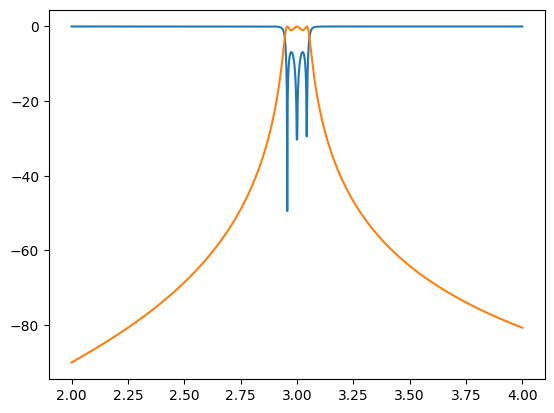

In [61]:
plt.plot(f, 20*np.log10((S11)),f, 20*np.log10((S21)))

In [62]:
#coupling factor mij
m_coupling_factor=np.zeros((N+2,N+2))
m_coupling_factor=fbw*M[1:N+1,1:N+1]
Qes=1/pow(M[0][1],2)/fbw
Qel=1/pow(M[N+1][N],2)/fbw
print(Qes)
print(Qel)
print(m_coupling_factor)

fp2=2.03
fp1=1.98

m_coupling_factor_sim=(fp2**2-fp1**2)/(fp2**2+fp1**2)
m_coupling_factor_sim

f0_sim=2
f1=1.983
f2=2.027
df_sim=f2-f1
Qes=f0_sim/df_sim
print(Qes)

60.710113463639075
60.71011346363903
[[0.         0.02350161 0.        ]
 [0.02350161 0.         0.02350161]
 [0.         0.02350161 0.        ]]
45.45454545454542
